# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [3]:
df=pd.read_csv('/kaggle/input/idmb-dataset/IMDB Dataset.csv')
df.head

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

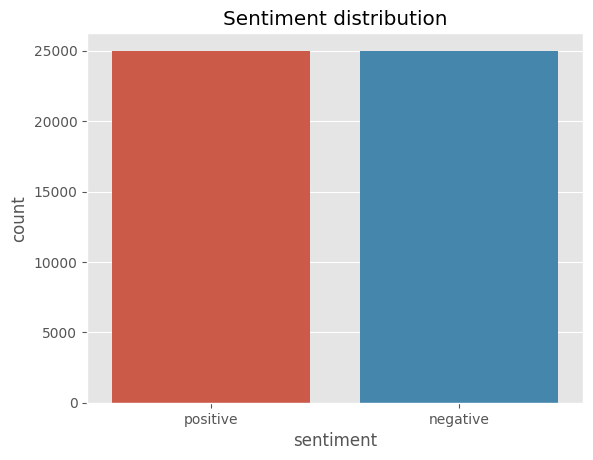

In [6]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment distribution')


In [7]:
for i in range(5):
    print("Review",[i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment:",df['sentiment'].iloc[i],"\n\n")

Review [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [8]:
#function to count te no. of words in the reviews
def no_of_words(text):
    words=text.split()
    word_count=len(words)
    return word_count

In [9]:
df['word_count']=df['review'].apply(no_of_words)

In [10]:
df.head()


,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


# Visualize the length of positive and negative sentiment and reviews

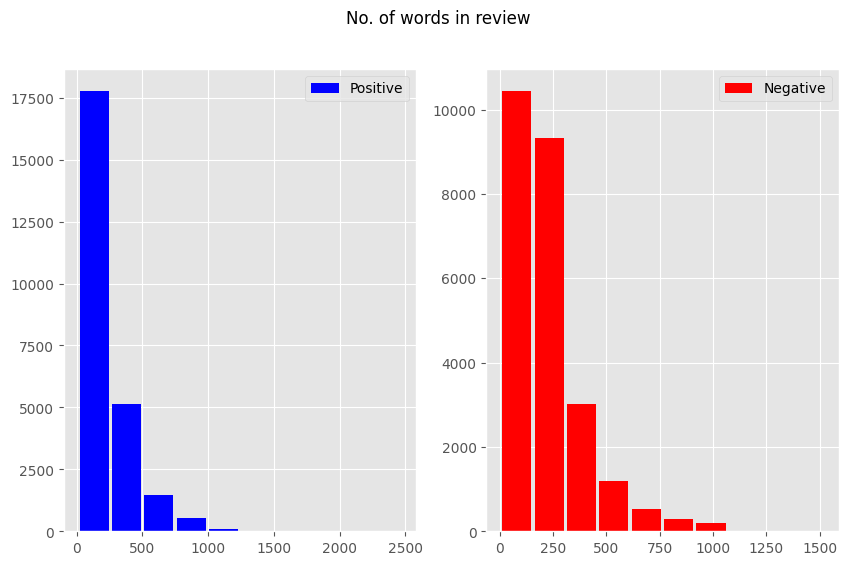

In [11]:
fig, ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df['sentiment']=='positive']['word_count'],label='Positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment']=='negative']['word_count'],label='Negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('No. of words in review')
plt.show()

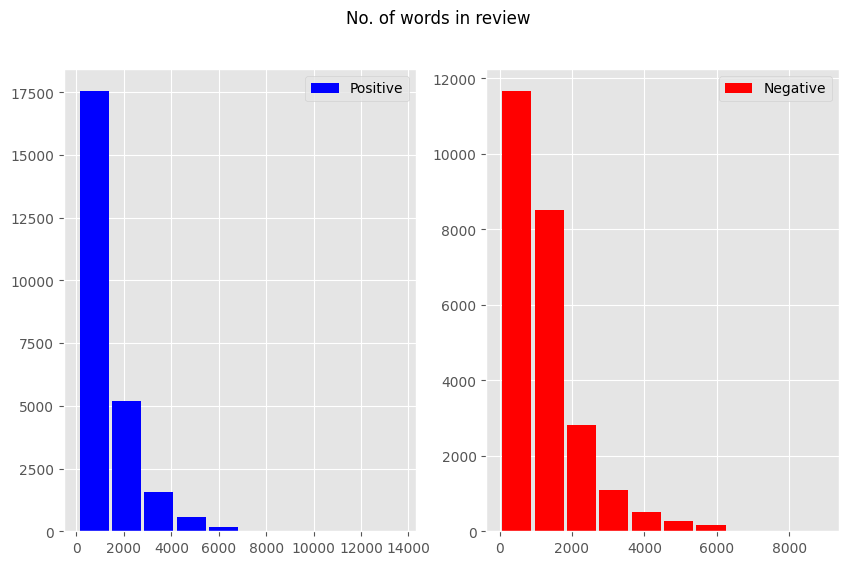

In [12]:
fig, ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df['sentiment']=='positive']['review'].str.len(),label='Positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment']=='negative']['review'].str.len(),label='Negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('No. of words in review')
plt.show()

# Convert text to numerical data

In [17]:
df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",2,inplace=True)


In [18]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


# Convert the data to usable form
process the text and pass the data

In [19]:
def data_processing(text):
    # Convert the text to lowercase to ensure uniformity
    text = text.lower()
    
    # Remove any HTML line breaks '<br />' from the text
    text = re.sub(r'<br />', '', text)
    
    # Remove any URLs starting with 'http', 'https', or 'www'
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    
    # Remove any words that start with '@' (e.g., Twitter handles) or '#' (e.g., hashtags)
    text = re.sub(r'@\w+|#', '', text)
    
    # Remove any characters that are not alphanumeric or whitespace (punctuation, special characters)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the processed text into words
    text_tokens = word_tokenize(text)
    
    # Remove stop words from the tokenized words (assuming stop_words is predefined)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    # Return the cleaned text, joining the filtered words into a single string
    return " ".join(filtered_text)
    

In [22]:
df.review=df['review'].apply(data_processing)

In [23]:
duplicated_count=df.duplicated().sum()
print("Number of duplicate entries: ",duplicated_count)

Number of duplicate entries:  421


In [25]:
df=df.drop_duplicates('review')

# Using prototype Stemma on dataset

In [26]:
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data

In [29]:
df.review=df['review'].apply(lambda x: stemming(x))


# Word Count has been reduced after these manipulations

In [30]:
df['word_count']=df['review'].apply(no_of_words)
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching oz episode yo...,1,167
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,85
3,basically theres family little boy jake thinks...,2,66
4,petter matteis love time money visually stunni...,1,125


# Separate Positive Reviews

In [31]:
# Filter the positive reviews where sentiment is 1
pos_reviews = df[df.sentiment == 1]

# Display the first few rows of positive reviews
pos_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching oz episode yo...,1,167
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,85
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,56


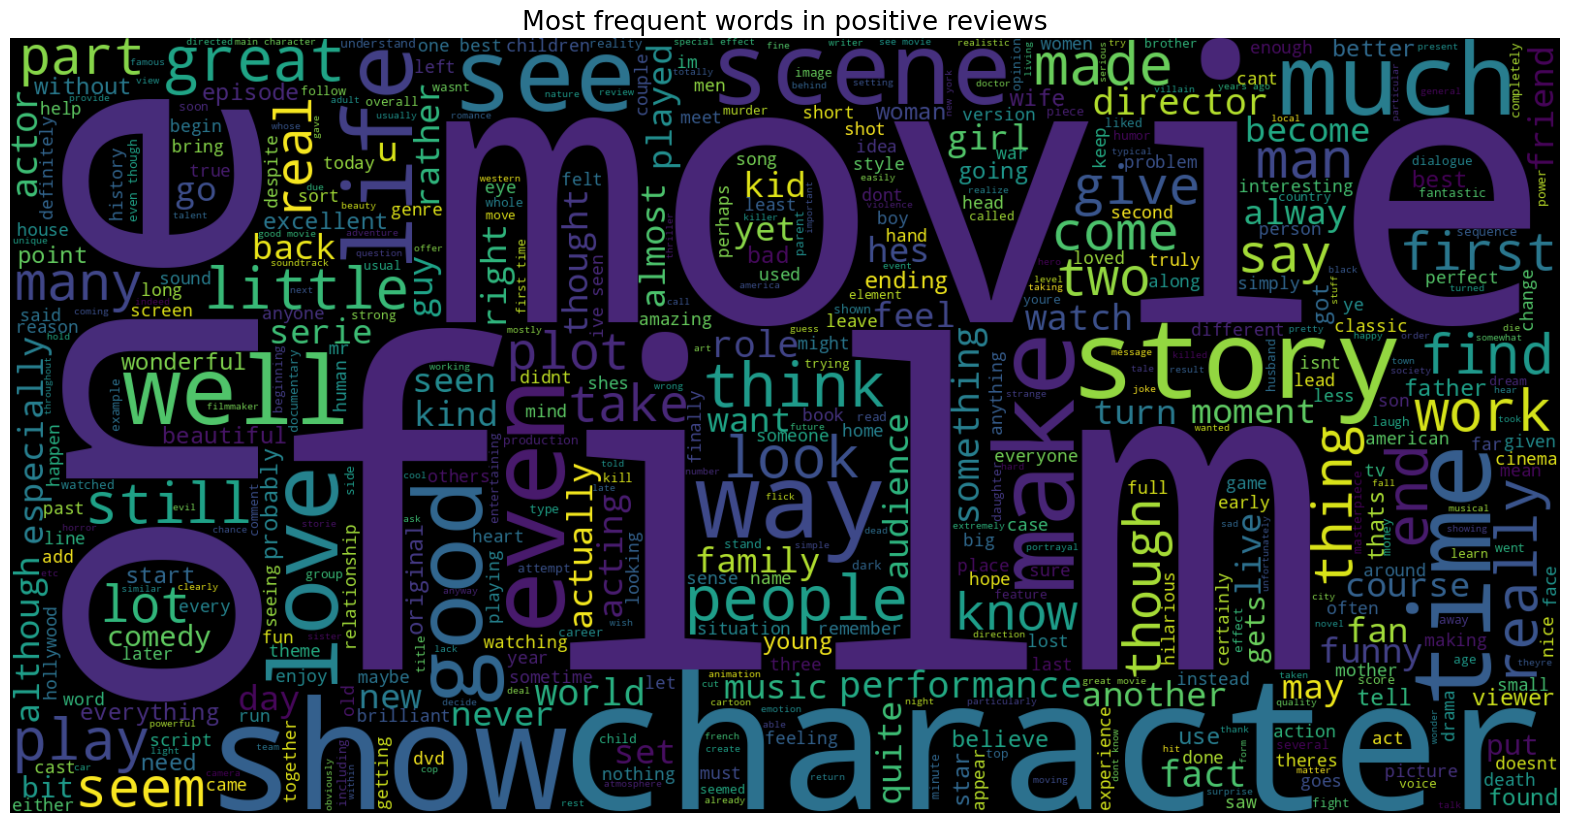

In [32]:

# Create a text string by joining all the words from the 'review' column in positive reviews
text = ' '.join([word for word in pos_reviews['review']])

# Plot the word cloud
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Most frequent words in positive reviews', fontsize=19)  # Add a title
plt.show()

In [33]:
from collections import Counter
count=Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('film', 39303),
 ('movie', 35854),
 ('one', 25630),
 ('like', 17000),
 ('good', 14291),
 ('great', 12572),
 ('story', 12347),
 ('see', 11818),
 ('time', 11739),
 ('well', 10937),
 ('really', 10640),
 ('also', 10520),
 ('would', 10320),
 ('even', 9320),
 ('much', 8974)]

In [36]:
pos_words=pd.DataFrame(count.most_common(15))
pos_words.columns=['word','count']
pos_words.head()

,word,count
0,film,39303
1,movie,35854
2,one,25630
3,like,17000
4,good,14291


In [38]:
px.bar(pos_words,x='count',y='word',title='Common words in positive reviews',color='word')

# Separate Negative Reviews

In [40]:
# Filter the neagative reviews where sentiment is 2
neg_reviews = df[df.sentiment == 2]

# Display the first few rows of negative reviews
neg_reviews.head()

,review,sentiment,word_count
3,basically theres family little boy jake thinks...,2,66
7,show amazing fresh innovative idea first aired...,2,78
8,encouraged positive comments film looking forw...,2,63
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie came recall scariest scene big bird ...,2,82


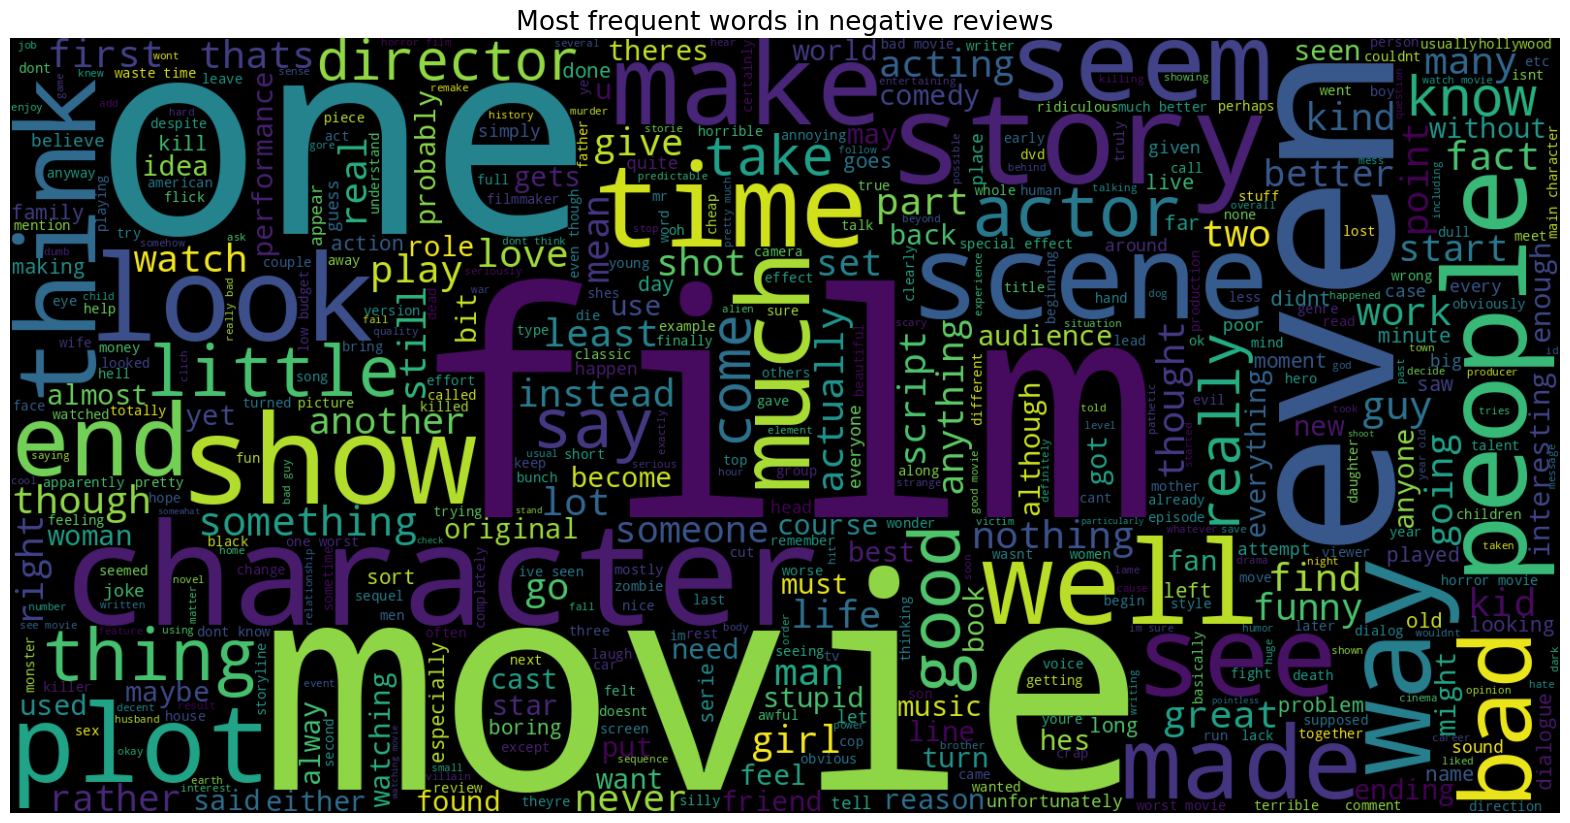

In [41]:
# Create a text string by joining all the words from the 'review' column in positive reviews
text = ' '.join([word for word in neg_reviews['review']])

# Plot the word cloud
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Most frequent words in negative reviews', fontsize=19)  # Add a title
plt.show()

In [42]:
from collections import Counter
count=Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('movie', 47046),
 ('film', 34686),
 ('one', 24377),
 ('like', 21514),
 ('even', 14761),
 ('good', 14004),
 ('bad', 13930),
 ('would', 13482),
 ('really', 12088),
 ('time', 11368),
 ('see', 10413),
 ('dont', 9920),
 ('get', 9886),
 ('much', 9758),
 ('story', 9572)]

In [43]:
neg_words=pd.DataFrame(count.most_common(15))
neg_words.columns=['word','count']
neg_words.head()

,word,count
0,movie,47046
1,film,34686
2,one,24377
3,like,21514
4,even,14761


In [44]:
px.bar(neg_words,x='count',y='word',title='Common words in negative reviews',color='word')

* x-verified reviews of the users
* y-feedback of users in terms of sentiment polarity

In [45]:
X=df['review']
Y=df['sentiment']

In [46]:
# Vectorize the 'review' column using TfidfVectorizer
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the sizes of the training and test sets
print("Size of x_train: ", x_train.shape)
print("Size of y_train: ", y_train.shape)
print("Size of x_test: ", x_test.shape)
print("Size of y_test: ", y_test.shape)

Size of x_train:  (34704, 214272)
Size of y_train:  (34704,)
Size of x_test:  (14874, 214272)
Size of y_test:  (14874,)


# Create a Machine Learning Model
*   Logistic Regression

In [47]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression  # For Logistic Regression classifier
from sklearn.naive_bayes import MultinomialNB        # For Naive Bayes classifier
from sklearn.svm import LinearSVC                    # For Support Vector Classifier (SVC)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation metrics
import warnings                                      # To filter out warnings

# Suppress any warnings
warnings.filterwarnings('ignore')

In [48]:
# Initialize a Logistic Regression model
logreg = LogisticRegression()

# Train the Logistic Regression model using the training data
logreg.fit(x_train, y_train)

# Use the trained model to predict the labels for the test data
logreg_pred = logreg.predict(x_test)

# Calculate the accuracy of the Logistic Regression model
logreg_acc = accuracy_score(logreg_pred, y_test)

# Print the test accuracy in percentage form
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))

Test accuracy: 88.89%


# Resut Accuracy on Logistic Regression
# > **88.89%**

In [50]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[6778  735]
 [ 918 6443]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Using Multi-Normal Naive Base Model

In [51]:
# Initialize a Multinomial Naive Bayes model
mnb = MultinomialNB()

# Train the model on the training data
mnb.fit(x_train, y_train)

# Use the trained model to predict labels for the test data
mnb_pred = mnb.predict(x_test)

# Calculate the accuracy of the Multinomial Naive Bayes model
mnb_acc = accuracy_score(mnb_pred, y_test)

# Print the test accuracy in percentage form
print("Test accuracy: {:.2f}%".format(mnb_acc * 100))


Test accuracy: 86.22%


# Resut Accuracy on Logistic Regression
# > **86.22%**

In [52]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[6778  735]
 [ 918 6443]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Using SVC-Support Vector Classifier Model

In [53]:
# Initialize a  Support Vector Classifier model
svc =LinearSVC()

# Train the model on the training data
svc.fit(x_train, y_train)

# Use the trained model to predict labels for the test data
svc_pred = svc.predict(x_test)

# Calculate the accuracy of the SVC
svc_acc = accuracy_score(svc_pred, y_test)

# Print the test accuracy in percentage form
print("Test accuracy: {:.2f}%".format(svc_acc * 100))


Test accuracy: 89.01%


# Resut Accuracy on Logistic Regression
# > **89.01%**

In [54]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[6778  735]
 [ 918 6443]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [55]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'loss':['hinge','squared_hinge']}
grid=GridSearchCV(svc,param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.870 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.877 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.891 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.887 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.894 total time=   0.6s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

# print the best cross violation in best parameter

In [57]:
print("best cross validation score:{:.2f}".format(grid.best_score_))
print("best parameters:",grid.best_params_)


best cross validation score:0.89
best parameters: {'C': 1, 'loss': 'hinge'}


# Applying to SVC model

In [58]:
# Initialize a  Support Vector Classifier model
svc =LinearSVC(C=1,loss='hinge')

# Train the model on the training data
svc.fit(x_train, y_train)

# Use the trained model to predict labels for the test data
svc_pred = svc.predict(x_test)

# Calculate the accuracy of the SVC
svc_acc = accuracy_score(svc_pred, y_test)

# Print the test accuracy in percentage form
print("Test accuracy: {:.2f}%".format(svc_acc * 100))


Test accuracy: 89.17%


In [59]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[6778  735]
 [ 918 6443]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Increased Accuracy
# Final Result
# 89.17%